# 모듈 설치

In [1]:
import os
import sys
# import re
import pickle
from collections import defaultdict, OrderedDict, Counter
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
# import json
from tqdm import tqdm

In [2]:
import numpy as np
import pandas as pd
# from pandas.plotting import scatter_matrix
# from pandas_profiling import ProfileReport
# from missingno import dendrogram
# import missingno as msno

# pd.options.display.float_format = '{:0.5f}'.format`

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(4.5, 3)})

----

# 데이터 베이스 활용

In [4]:
# 해당 데이터들의 정보와 DataFrame를 불러올 수 있는 딕셔너리
# 파일 크기 큼 주의
with open('Database.p', 'rb') as file:    
    DataBase = pickle.load(file)

In [5]:
# 해당 데이터들의 정보들만 빠르게 파악할 수 있는 딕셔너리
with open('Database_info.p', 'rb') as file:
    DataBase_info = pickle.load(file)

In [6]:
def db_NameList():
    """데이터베이스 안에 있는 data 이름들 리스트로 반환

    Returns:
        list: data Names in DataBase
    """
    return list(DataBase_info.keys())

In [7]:
def db_nameToInfo(name):
    """데이터베이스 중에 name 에 해당하는 정보들을 딕셔너리 형태로 반환

    Args:
        name (str): 데이터 이름 (한글)

    Returns:
        dict: name data's information
    """
    return DataBase_info[name]

In [8]:
def db_nameToDataframe(name):
    """데이터베이스 중에 name 에 해당하는 데이터 프레임 반환

    Args:
        name (str): 데이터 이름 (한글)

    Returns:
        DataFrame: name data's DataFrame
    """
    return DataBase[name]['data']

In [9]:
def db_nameToColumns(name):
    """데이터베이스 중에 name 에 해당하는 데이터 프레임의 칼럼 리스트 반환

    Args:
        name (str): 데이터 이름 (한글)

    Returns:
        list: name data's columns
    """
    return db_nameToInfo(name)['columns']

# 데이터 분석- 1

In [10]:
df = db_nameToDataframe(db_NameList()[3]).copy()

In [15]:
place_df = df[df['목적지 광역시도명'] == '서울특별시']

In [16]:
place_df['날짜'] = pd.to_datetime(place_df['날짜'])

In [17]:
place_df

,날짜,시간대별 시간,배달상점 업종명,목적지 광역시도명,목적지 시군구명,주문 건수
1780,2019-05-19,14,치킨,서울특별시,중구,1
2072,2019-05-21,16,한식,서울특별시,도봉구,1
2601,2019-05-24,12,치킨,서울특별시,도봉구,1
3603,2019-05-27,23,치킨,서울특별시,중구,1
3888,2019-05-29,16,치킨,서울특별시,도봉구,1
...,...,...,...,...,...,...
1026009,2021-07-31,23,패스트푸드,서울특별시,서초구,1
1026010,2021-07-31,23,패스트푸드,서울특별시,양천구,1
1026037,2021-07-31,23,한식,서울특별시,관악구,1
1026038,2021-07-31,23,한식,서울특별시,금천구,1


In [18]:
place_df['요일'] = place_df['날짜'].dt.day_name()

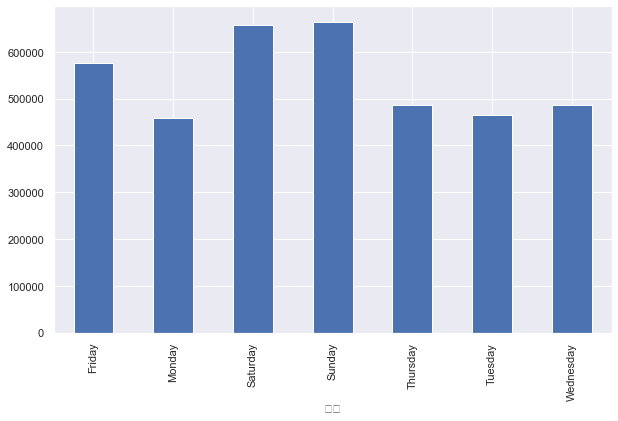

In [22]:
plt.figure(figsize=(10,6))
place_df.groupby('요일')['주문 건수'].sum().plot.bar();

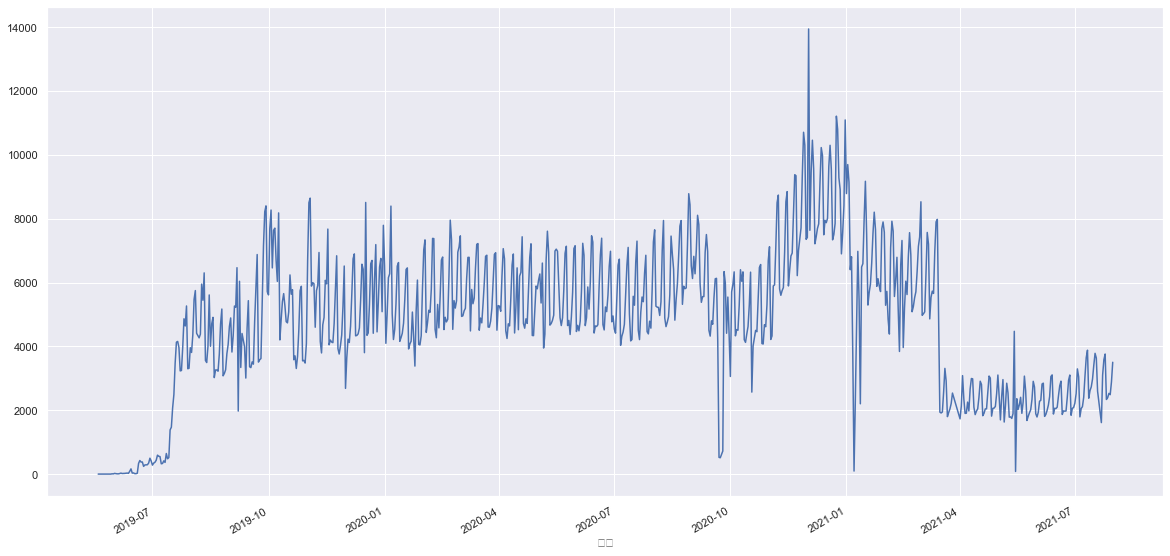

In [23]:
plt.figure(figsize=(20,10))
place_df.groupby('날짜')['주문 건수'].sum().plot.line();

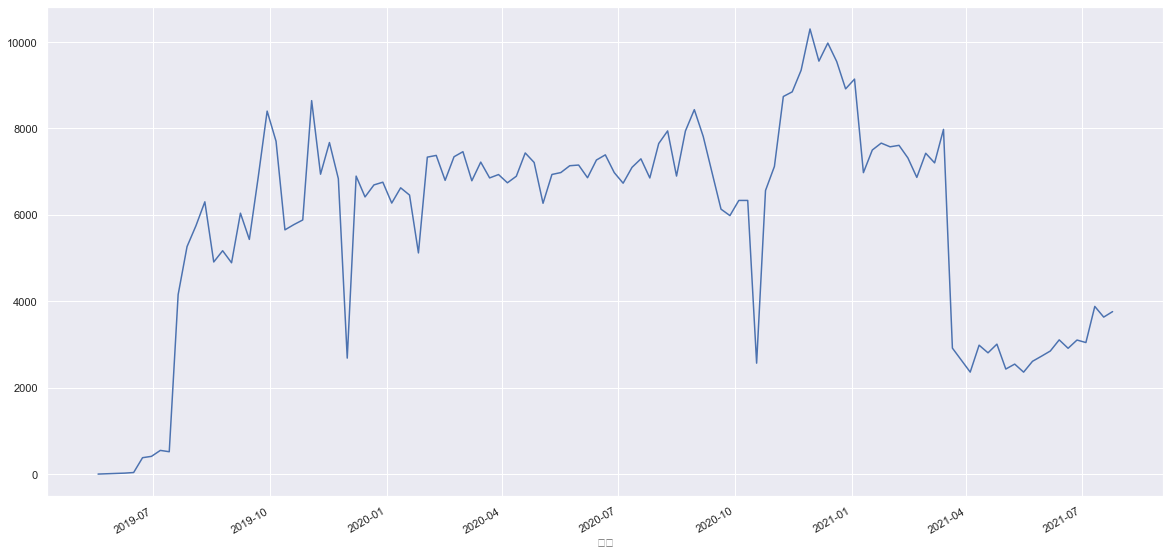

In [24]:
plt.figure(figsize=(20,10))
place_df[place_df['요일'] == 'Sunday'].groupby('날짜')['주문 건수'].sum().plot.line();

In [30]:
place_df['MA_7'] = place_df['주문 건수'].rolling(window=7).mean()

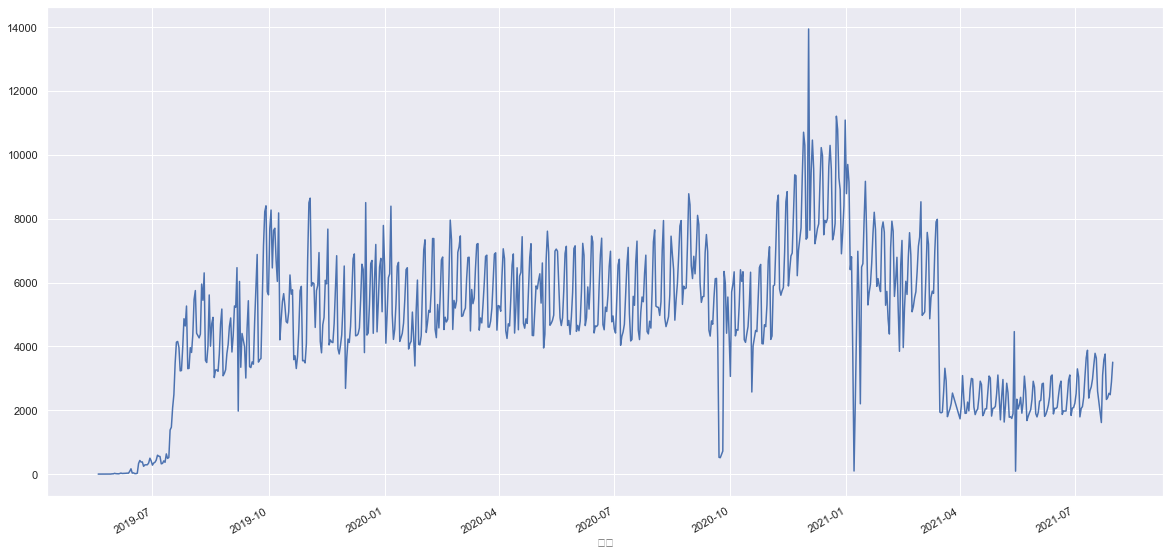

In [31]:
plt.figure(figsize=(20,10))
place_df.groupby('날짜')['MA_5'].sum().plot.line();

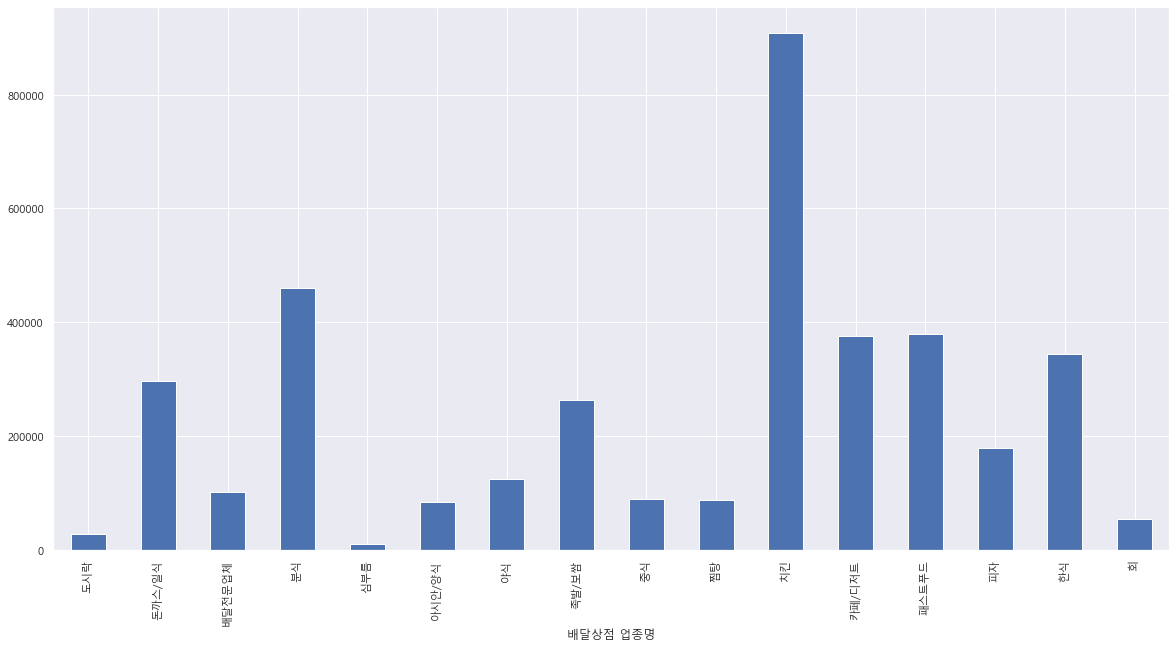

In [49]:
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
place_df.groupby('배달상점 업종명')['주문 건수'].sum().plot.bar();

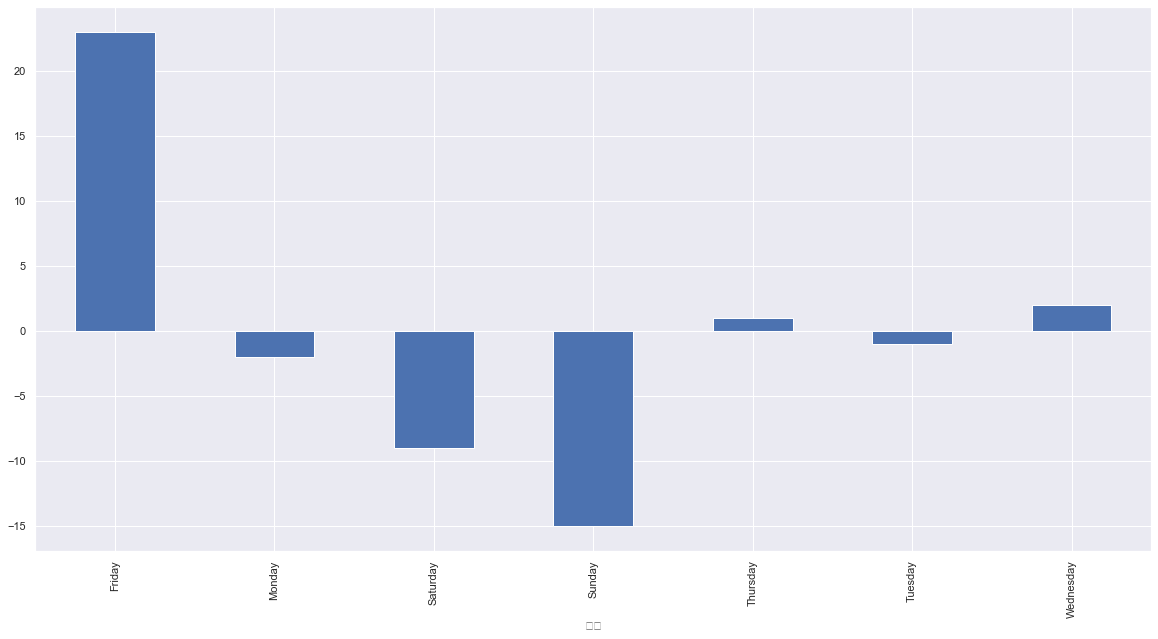

In [54]:
plt.figure(figsize=(20,10))
df.groupby('요일')['dff_주문 건수'].sum().plot.bar();

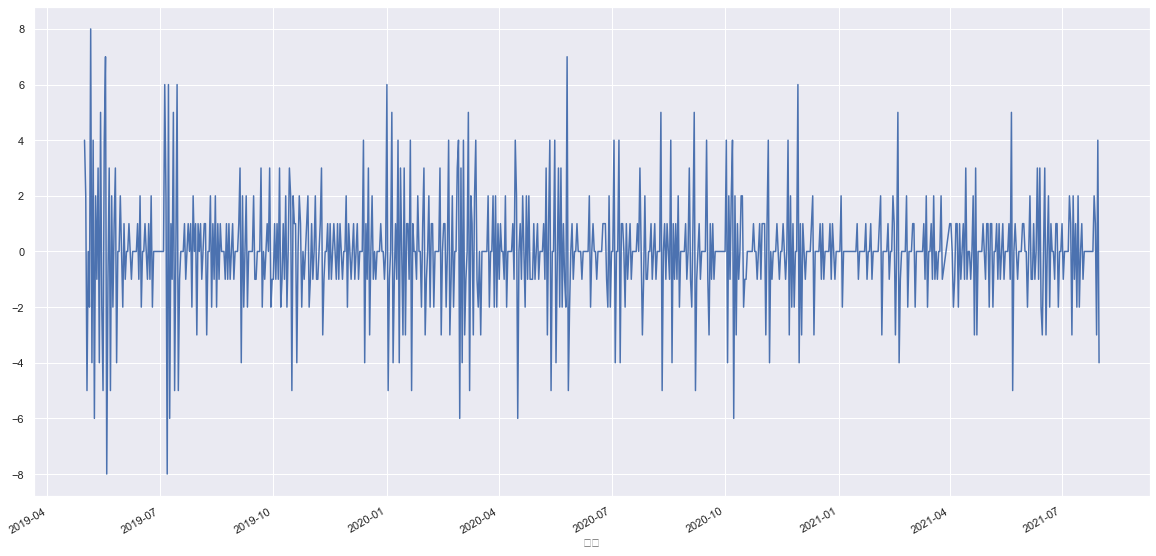

In [53]:
plt.figure(figsize=(20,10))
df.groupby('날짜')['dff_주문 건수'].sum().plot.line();

# 데이터 분석- 2

In [66]:
dfList = []
for name in db_NameList()[-3:]:
    df = db_nameToDataframe(name)
    cols = db_nameToColumns(name)
    key = ''
    for col in cols[:-1]:
        df[col] = df[col].astype(str)
    df['key'] = df[cols[0]]+df[cols[1]]+df[cols[2]]+df[cols[3]]+df[cols[4]]
    dfList.append(df)
    print(name)
    print(db_nameToColumns(name))
    # print(db_nameToDataframe(name).head(4))
    # print()

업종-지역별 평균주문금액
['날짜', '시간대별 시간', '배달상점 업종명', '배달상점 광역시도명', '배달상점 시군구명', '평균주문금액']
업종-지역별 배달 주문건수
['날짜', '시간대별 시간', '배달상점 업종명', '배달상점 광역시도명', '배달상점 시군구명', '주문 건수']
업종-지역별 평균배달소요시간
['날짜', '시간대별 시간', '배달상점 업종명', '배달상점 광역시도명', '배달상점 시군구명', '평균배달소요시간(분)']


In [68]:
for df in dfList:
    print(len(df['key']), df['key'].nunique())

3223132 3223132
3367316 3367316
3333595 3333595


In [71]:
df = pd.merge(dfList[0], dfList[1], how='inner', on='key')
df = pd.merge(df, dfList[2], how='inner', on='key')

In [84]:
df = df[list(df.columns)[:5] + ['주문 건수', '평균주문금액', '평균배달소요시간(분)']]
df.columns = list(map(lambda x: x[:-2], list(df.columns)[:5])) + ['주문 건수', '평균주문금액', '평균배달소요시간(분)']

In [88]:
df['매출'] = df['주문 건수'] * df['평균주문금액']

In [94]:
place_df = df[df['배달상점 광역시도명'] == '서울특별시']

<AxesSubplot:xlabel='날짜'>

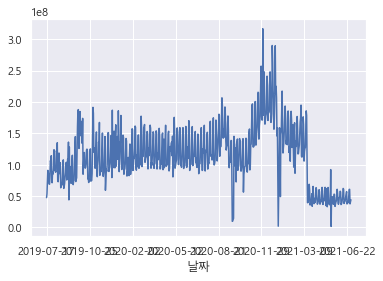

In [99]:
place_df.groupby('날짜')['매출'].sum().plot.line()

In [100]:
place_df

,날짜,시간대별 시간,배달상점 업종명,배달상점 광역시도명,배달상점 시군구명,주문 건수,평균주문금액,평균배달소요시간(분),매출
6,2019-07-17,0,분식,서울특별시,구로구,3,18833,23.97,56499
11,2019-07-17,0,족발/보쌈,서울특별시,구로구,1,25000,20.03,25000
14,2019-07-17,0,치킨,서울특별시,구로구,7,26400,19.58,184800
19,2019-07-17,0,패스트푸드,서울특별시,구로구,3,16867,26.77,50601
24,2019-07-17,1,분식,서울특별시,구로구,5,17000,29.23,85000
...,...,...,...,...,...,...,...,...,...
3194530,2021-06-30,23,치킨,서울특별시,금천구,4,26300,24.52,105200
3194531,2021-06-30,23,치킨,서울특별시,도봉구,1,20500,21.70,20500
3194532,2021-06-30,23,치킨,서울특별시,은평구,1,42800,5.83,42800
3194545,2021-06-30,23,카페/디저트,서울특별시,관악구,1,26500,23.02,26500
